In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv("C:/THREE2/SMA391/Fraud detection app/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [193]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1534,ham,Remember on that day..,NaN,NaN,NaN
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN
2194,ham,Hi my email address has changed now it is,NaN,NaN,NaN
928,ham,Oh all have to come ah?,NaN,NaN,NaN
1318,ham,Ok...,NaN,NaN,NaN


In [194]:
df.shape

(5572, 5)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [196]:
# drop last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [197]:
#renaming the columns
df.rename(columns={"v1" : "target", "v2":"text"}, inplace=True)
df.sample(5)

,target,text
658,ham,It doesnt make sense to take it there unless i...
4884,ham,Poor girl can't go one day lmao
943,ham,And also I've sorta blown him off a couple tim...
3609,ham,"Call me. I m unable to cal. Lets meet bhaskar,..."
813,ham,I borrow ur bag ok.


In [198]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder

In [199]:
df["target"].isnull().sum()

0

encoder.fit_transform(df["target"])

In [200]:
df["target"].unique()

array(['ham', 'spam'], dtype=object)

df["target"] = encoder.fit_transform(df["target"])
df.sample(5)


In [201]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
df["target"].unique()

array(['ham', 'spam'], dtype=object)

In [203]:
df.sample()

,target,text
2408,ham,Dear where you will be when i reach there


In [204]:
df1 = df
dict={'ham': 0 ,'spam': 1}
df["target"]=df["target"].replace(dict)

In [205]:
df1.sample(6)

,target,text
4826,0,Yup but it's not giving me problems now so may...
4109,0,"Yo, you gonna still be in stock tomorrow/today..."
3822,0,Please protect yourself from e-threats. SIB ne...
1715,0,Asking do u knw them or nt? May be ur frnds or...
2462,0,"Rose needs water, season needs change, poet ne..."
4387,0,"see you then, we're all christmassy here!"


In [206]:
df1["target"].unique()

array([0, 1], dtype=int64)

In [207]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [208]:
df.duplicated().sum()

403

In [209]:
# remove duplicates
df=df.drop_duplicates(keep="first")

In [210]:
df.duplicated().sum()

0

In [211]:
df.shape

(5169, 2)

## 2. EDA

In [212]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [213]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

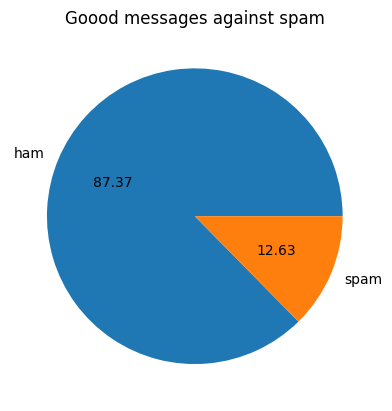

In [214]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.title("Goood messages against spam")
plt.show()

### Data is imbalanced

In [215]:
import nltk


In [216]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
df["text"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [218]:
df["num_characters"]=df["text"].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\3309080630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)


In [219]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [220]:
# Num of words
df["Num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\1435298799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [221]:
df.head()

,target,text,num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [222]:
df["num_sentence"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\4210305132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentence"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [223]:
df.head()

,target,text,num_characters,Num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [224]:
df[["num_characters", "Num_words", "num_sentence"]].describe()

,num_characters,Num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [225]:
# ham
df[df["target"]==0][['num_characters', 'Num_words', 'num_sentence']].describe()

,num_characters,Num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [226]:
# Spam
df[df["target"]==1][['num_characters', 'Num_words', 'num_sentence']].describe()

,num_characters,Num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

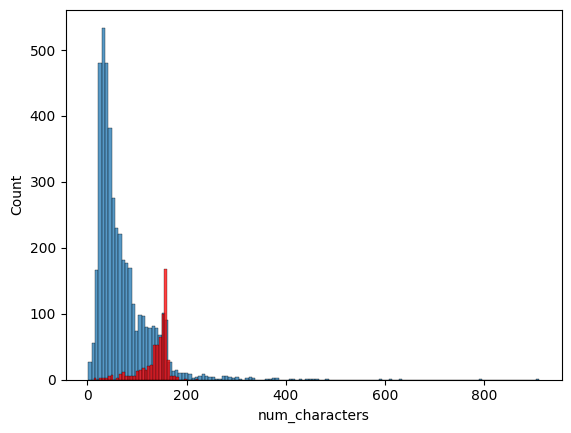

In [227]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color='red')

<Axes: xlabel='Num_words', ylabel='Count'>

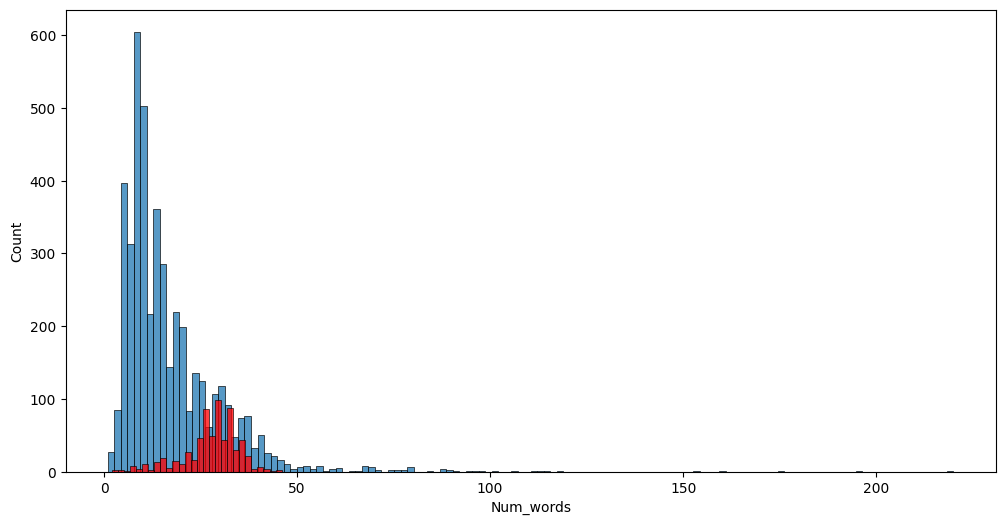

In [228]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["target"]==0]["Num_words"])
sns.histplot(df[df["target"]==1]["Num_words"], color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

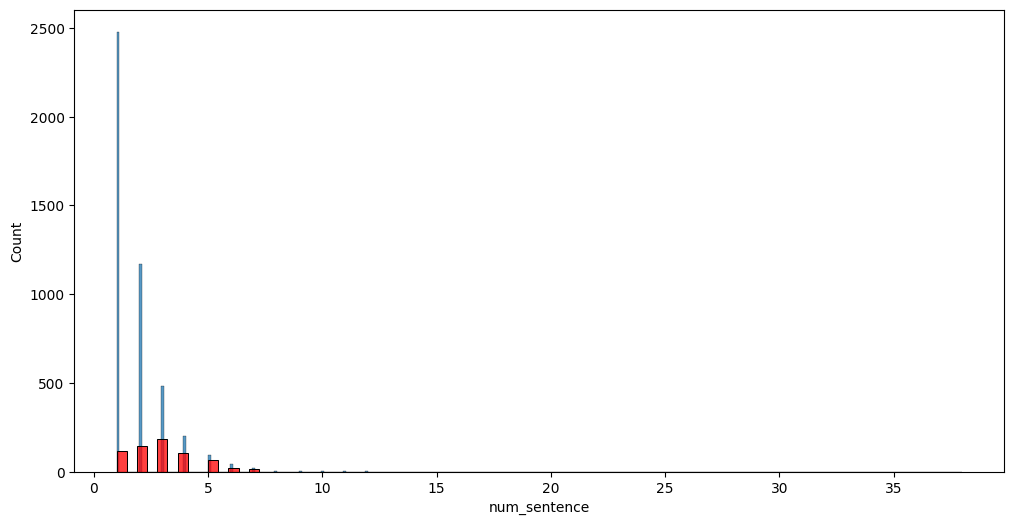

In [229]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["target"]==0]["num_sentence"])
sns.histplot(df[df["target"]==1]["num_sentence"], color='red')

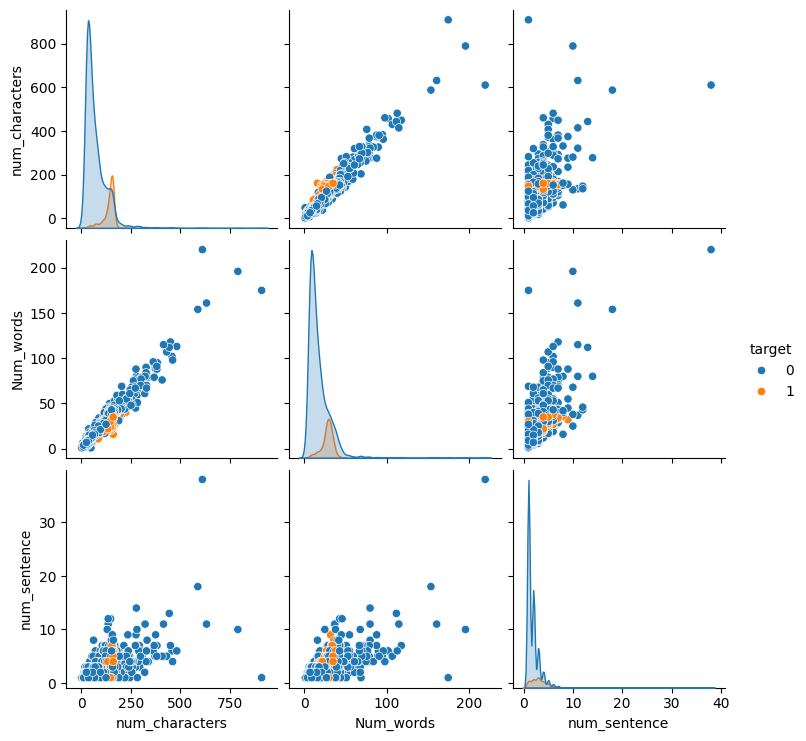

In [230]:
sns.pairplot(df, hue="target")

In [231]:
df[['target', 'num_characters', 'Num_words', 'num_sentence']].corr()

,target,num_characters,Num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
Num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

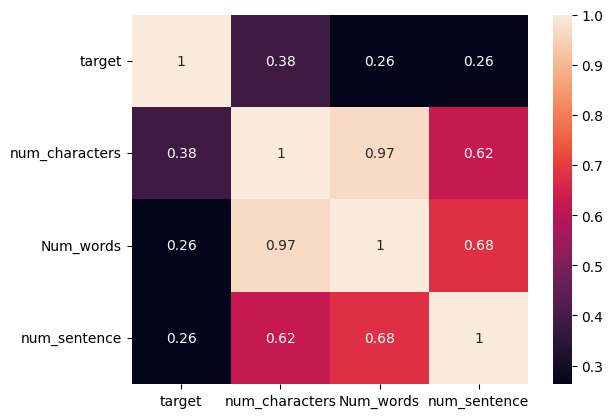

In [232]:
sns.heatmap(df[['target', 'num_characters', 'Num_words', 'num_sentence']].corr(), annot=True)

### 3. Data Preprocessing
. Lower case
. Tokenization
. Removing special characters
. Removing stop words and punctuation
. Stemming

In [233]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [234]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [236]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [237]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [238]:
transform_text("I loved the YT lectures on Machine learning?")

'love yt lectur machin learn'

In [239]:
transform_text("Hi, How are you? 20% shits")

'hi 20 shit'

In [240]:
df["text"][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [241]:
transform_text(df["text"][2000])

'b go 2 sch mon si need 2 take smth'

In [242]:
df["transformed_text"] = df['text'].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11428\870467769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df['text'].apply(transform_text)


In [243]:
df.head()

,target,text,num_characters,Num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [245]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=5, background_color="white")

In [246]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep= " "))

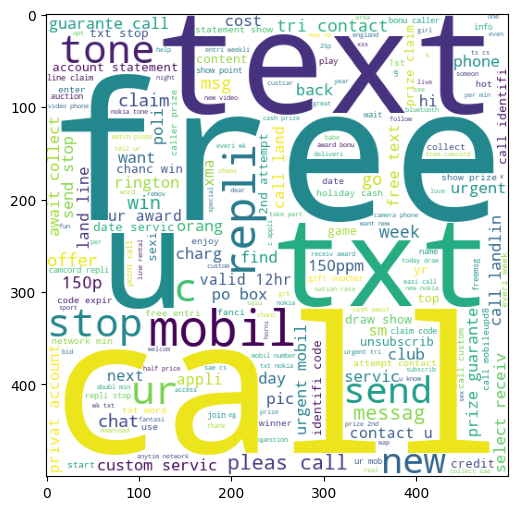

In [247]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [248]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep= " "))

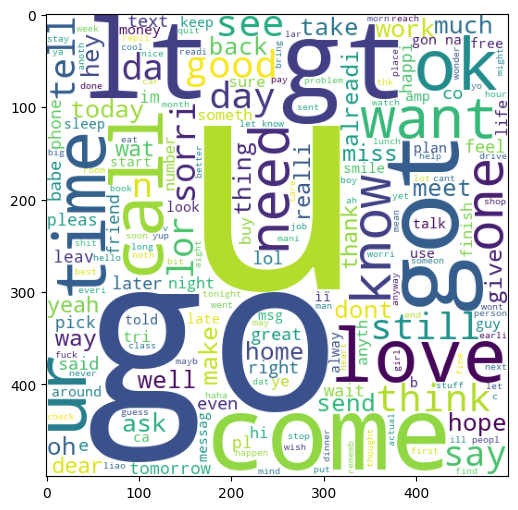

In [249]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [250]:
df.head()

,target,text,num_characters,Num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [251]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [252]:
len(spam_corpus)

9939

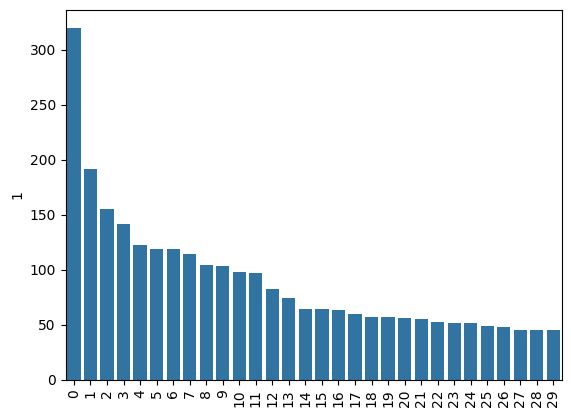

In [253]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [254]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [255]:
len(ham_corpus)

35404

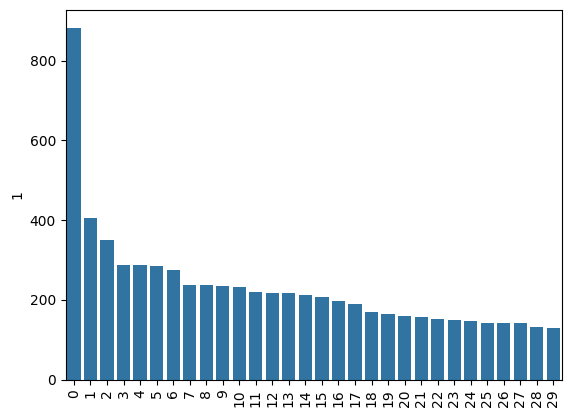

In [256]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [257]:
len(ham_corpus)

35404

In [258]:
# Text Vectorization
# Using Bag of Words
df.head()

,target,text,num_characters,Num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. Model Building 

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [260]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [126]:
X = np.hstack((X, df["num_characters"].values.reshape(-1, 1)))

In [261]:
X.shape

(5169, 6708)

In [262]:
y=df['target'].values

In [263]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)

In [266]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [267]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [268]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [269]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [270]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [271]:
# tfidf--> MNB

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [297]:
svc=SVC(kernel="sigmoid",gamma= 1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='lbfgs', penalty='l2')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)


In [299]:
clfs={
    'SVC':svc,
    'KN': knc,
    'MB':mnb,
    'DT': dtc,
    'RF':rfc, 
    'AdaBoost':abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb':xgb
}
# 'LR':lrc,

In [283]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [292]:
def train_classifier(clf, X_train, y_train, x_test, y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)

    return accuracy,precision


In [293]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [300]:
accuracy_scores=[]
precision_scores=[]
for name, clf in clfs.items():
    current_accuracy, current_precision=train_classifier(clf, X_train, y_train, X_test, y_test )
    print("For", name)
    print("Accuracy-", current_accuracy)
    print("Precision-", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy- 0.9729206963249516
Precision- 0.9741379310344828
For KN
Accuracy- 0.9003868471953579
Precision- 1.0
For MB
Accuracy- 0.9593810444874274
Precision- 1.0
For DT
Accuracy- 0.9361702127659575
Precision- 0.8461538461538461
For RF
Accuracy- 0.971953578336557
Precision- 1.0
For AdaBoost
Accuracy- 0.9613152804642167
Precision- 0.9454545454545454
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8625954198473282
For ETC
Accuracy- 0.9729206963249516
Precision- 0.9824561403508771
For GBDT
Accuracy- 0.9526112185686654
Precision- 0.9238095238095239
For xgb
Accuracy- 0.9729206963249516
Precision- 0.9435483870967742


In [301]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision": precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,MB,0.959381,1.000000
3,DT,0.936170,0.846154
4,RF,0.971954,1.000000
5,AdaBoost,0.961315,0.945455
6,BgC,0.958414,0.862595
7,ETC,0.972921,0.982456
8,GBDT,0.952611,0.923810
9,xgb,0.972921,0.943548


In [303]:
sorted_performance_df = performance_df.sort_values(by=["Accuracy", "Precision"], ascending=[False, False])
sorted_performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
9,xgb,0.972921,0.943548
4,RF,0.971954,1.000000
5,AdaBoost,0.961315,0.945455
2,MB,0.959381,1.000000
6,BgC,0.958414,0.862595
8,GBDT,0.952611,0.923810
3,DT,0.936170,0.846154
1,KN,0.900387,1.000000


In [308]:
performance_df1=pd.melt(sorted_performance_df, id_vars="Algorithm")

In [309]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.972921
1,SVC,Accuracy,0.972921
2,xgb,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,AdaBoost,Accuracy,0.961315
5,MB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,DT,Accuracy,0.936170
9,KN,Accuracy,0.900387


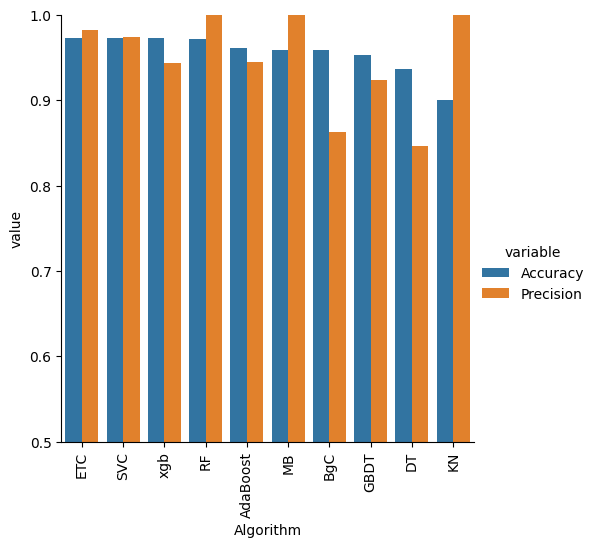

In [310]:
sns.catplot(x='Algorithm', y='value',hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
# model improvement
# 1. Change the max_features parameter IfIdf

In [127]:
performance_df=pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, "Precision_max_ft_3000": precision_scores})
temp_df=pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_scalling":accuracy_scores, "Precision_scalling": precision_scores})

In [128]:
new_df_scaled=performance_df.merge(temp_df, on='Algorithm')

In [129]:
new_df_scaled=new_df.merge(temp_df, on='Algorithm')

In [130]:
new_df_scaled

,Algorithm,Accuracy_scalling_x,Precision_Scalling,Accuracy_scalling_y,Precision_scalling
0,SVC,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000
2,MB,0.970986,1.000000,0.970986,1.000000
3,DT,0.929400,0.828283,0.929400,0.828283
4,RF,0.975822,0.982906,0.975822,0.982906
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,BgC,0.958414,0.868217,0.958414,0.868217
7,ETC,0.974855,0.974576,0.974855,0.974576
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,xgb,0.967118,0.926230,0.967118,0.926230


In [131]:
# voting Classifier
svc=SVC(kernel='sigmoid', gamma=1.0, probability=True)
anb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [132]:
voting=VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [133]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [134]:
y_pred=voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [135]:
# Applying Stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [136]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [139]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [140]:
import pickle
pickle.dump(tfidf, open('vectorizer.pk1', 'wb'))
pickle.dump(mnb, open("model.pk1", 'wb'))